



## Praktischer Hintergrund mit R

Beispiel mit Datensatz über Kyphosis:
N = 81 Beobachtungen
Kyphosis: 
absent = Krümmung nach OP vorhanden
present = Krümmung nach OP nicht vorhanden
Age= Alter in Monaten
Number = Anzahl der Betroffenen Wirbel
Start = Wirbel, an dem der Eingriff begonnen wurde

Im Folgenden wird der Aufbau von Entscheidungsb ̈aumen am Beispiel des Methode und des daraus Implementierten Programms CART (Classification and Regression Trees; Breiman et al., 1984) systematisch vorgestellt.
A ̈quivalente Funktion in R: rpart() in Paket rpart.

In [8]:
library(rpart)
data(kyphosis)
str(kyphosis) #überblick über die dtaenstruktur
head (kyphosis, n=10) # damit werden die daten ausgegeben

'data.frame':	81 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 1 2 1 1 1 1 1 1 2 ...
 $ Age     : int  71 158 128 2 1 1 61 37 113 59 ...
 $ Number  : int  3 3 4 5 4 2 2 3 2 6 ...
 $ Start   : int  5 14 5 1 15 16 17 16 16 12 ...


Kyphosis,Age,Number,Start
absent,71,3,5
absent,158,3,14
present,128,4,5
absent,2,5,1
absent,1,4,15
absent,1,2,16
absent,61,2,17
absent,37,3,16
absent,113,2,16
present,59,6,12


In [9]:
#auszählen der beobachtungen die der datensatz enthält für die Trainigdatensatz
#mit 70 % der gesamt Beobachtungen, zufällig gesamt 56 beobachtungen
n_Daten <- nrow(kyphosis)  # 81 Zeilen 
n_Daten
# 70% der Daten sollen zufällig ausgewählt zum Training verwendet werden
# (als Index):
Training_i <- sample(nrow(kyphosis), 0.7 * n_Daten)
length(Training_i) # Anzahl (und Nr.) der ausgewählten “Zeilen”




[1] 81

[1] 56

Insgesamt liegen 81 Beobachtungen vor, daraus wurden zufällig 56 Dtaensätze extrachiert. Die Differenz zwischen allen Beobachtungen und dem trainingsdatensatz ist der Testdatensatz mit 25 Datensätzen

In [10]:
#aus der Differenz zw ges.Beobachtungen und dem trainingdatensatz wird der Testdatensatz zusammengestellt
Test_i <- setdiff(1:nrow(kyphosis), Training_i)
length(Test_i)

sort(Training_i); sort(Test_i) # der größe nach werden die gebildeten vektoren angezeigt

[1] 25

[1]  2  3  4  5  6  7  8  9 10 12 13 14 17 18 19 20 22 23 24 26 28 29 30 31 32
[26] 33 37 39 41 42 43 46 49 50 55 56 57 58 59 60 61 62 63 64 65 66 70 71 72 73
[51] 74 75 76 79 80 81

[1]  1 11 15 16 21 25 27 34 35 36 38 40 44 45 47 48 51 52 53 54 67 68 69 77 78

In [11]:
#ausschneiden der Training- und Testdatensatzes
Training <- kyphosis[Training_i,]
str(Training)

'data.frame':	56 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 2 1 1 1 1 2 1 1 1 1 ...
 $ Age     : int  121 125 61 2 1 114 72 11 37 130 ...
 $ Number  : int  3 2 2 3 4 7 5 3 3 5 ...
 $ Start   : int  3 11 17 13 15 8 15 15 16 13 ...


In [12]:
Test <- kyphosis[Test_i,]
str(Test)

'data.frame':	25 obs. of  4 variables:
 $ Kyphosis: Factor w/ 2 levels "absent","present": 1 2 1 1 1 2 1 1 1 1 ...
 $ Age     : int  71 82 168 1 22 15 8 112 140 93 ...
 $ Number  : int  3 5 3 3 2 7 3 3 5 3 ...
 $ Start   : int  5 14 18 16 16 2 6 16 11 16 ...


Training und Testdatensatz wurden gebieldet. es kann ein Entscheidungsbaum erstellt werden.

n= 56 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 56 11 absent (0.80357143 0.19642857)  
  2) Start>=8.5 43  3 absent (0.93023256 0.06976744) *
  3) Start< 8.5 13  5 present (0.38461538 0.61538462) *


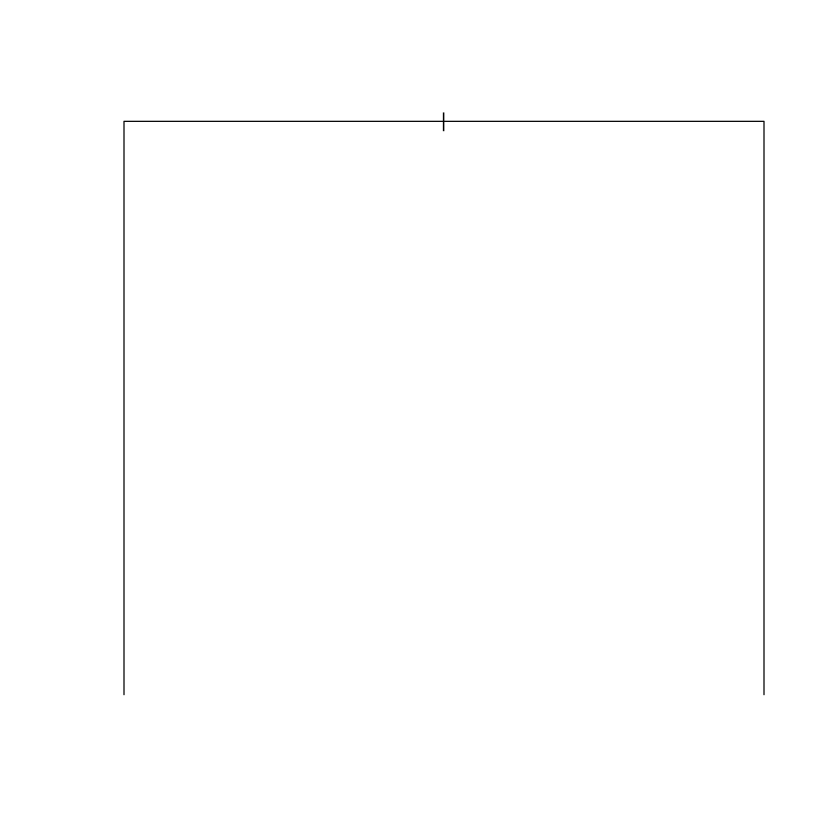

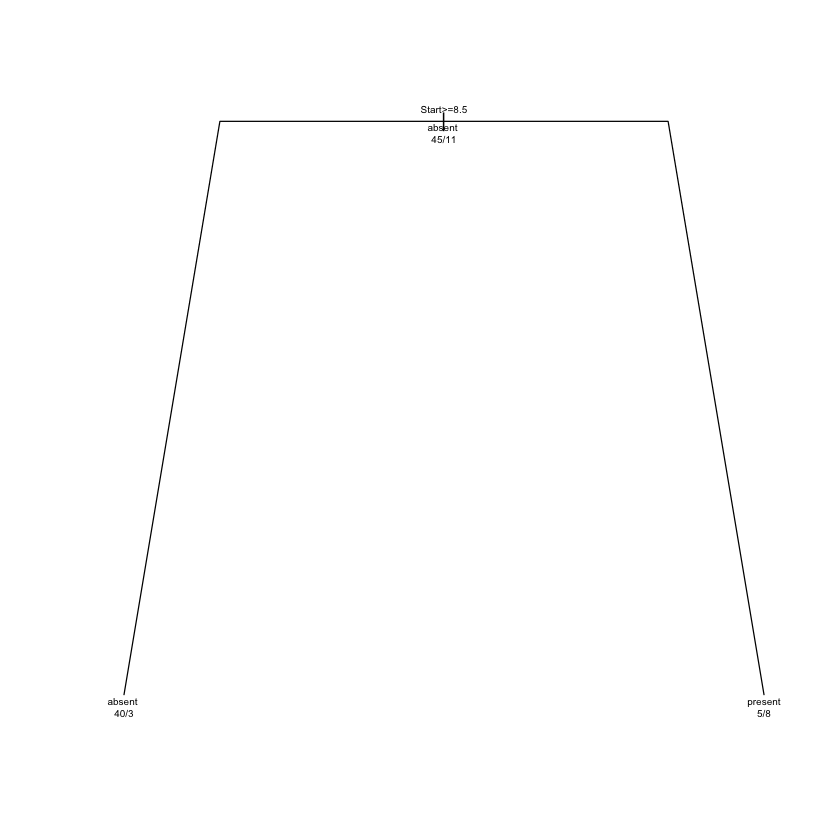

In [18]:
Anpassung <- rpart(Kyphosis ~ Age + Number + Start, data = Training)
print(Anpassung)


#Create the tree.
  output.tree = rpart(Kyphosis ~ Age + Number + Start, 
  data = Training)

plot(output.tree)


plot(Anpassung, uniform = T, compress = T, branch = 0.7)
text(Anpassung, all = T, use.n = T, cex = 0.5)

Quellen
https://www.youtube.com/watch?v=diPvHSeizkg
http://www.amse.ru/archive/courses/2006/nikolenko/01-dectrees.pdf